In [1]:
from processor import *

import numpy as np
from scipy.spatial.distance import cdist, pdist
import seaborn as sns
from matplotlib import rcParams

In [2]:
p = CifProcessor()

In [3]:
p.get_metatable()

In [4]:
p.read_pkl_metainfo()

In [5]:
p.read_pkl(mode='rg', folder='data/processed/')

In [6]:
p.table['Family'].unique()

array(['GPa1family', '-', 'Gi/o', 'Gs', 'Beta', 'Gq/11', 'Visual'],
      dtype=object)

In [7]:
f = p.filter_dfl_via_table(State='Active', Cl='A', gprotein=True)

In [205]:
f_gio = p.filter_dfl_via_table(State='Active', Cl='Rhodopsin', Family='Gi/o', gprotein=True)
len(f_gio)

41

In [206]:
f_gio[f_gio['PDB']=='6FUF']

,uniprot(gene),receptor family,Cl.,Species,Method,PDB,Resolution,Preferred Chain,State,Degree active %,Family,Subtype,Function
30,OPSD,Opsins,A(Rhodopsin),Bovine,X-ray,6FUF,3.1,A,Active,100,Gi/o,αo,Agonist


In [207]:
f_gio = f_gio[f_gio['Method']!='X-ray']
# Combine with 6FUF

In [241]:
f_gio

,uniprot(gene),receptor family,Cl.,Species,Method,PDB,Resolution,Preferred Chain,State,Degree active %,Family,Subtype,Function
0,NTR1,Neurotensin,A(Rhodopsin),Human,cryo-EM,6OSA,3.0,R,Active,100,Gi/o,αi1,Agonist
1,NTR1,Neurotensin,A(Rhodopsin),Human,cryo-EM,6OS9,3.0,R,Active,100,Gi/o,αi1,Agonist
2,CXCR2,Chemokine,A(Rhodopsin),Human,cryo-EM,6LFM,3.5,R,Active,100,Gi/o,αi1,Agonist
3,CXCR2,Chemokine,A(Rhodopsin),Human,cryo-EM,6LFO,3.4,R,Active,100,Gi/o,αi1,Agonist
4,ADA2B,Adrenoceptors,A(Rhodopsin),Human,cryo-EM,6K42,4.1,R,Active,100,Gi/o,αi1,Agonist
5,ADA2B,Adrenoceptors,A(Rhodopsin),Human,cryo-EM,6K41,2.9,R,Active,100,Gi/o,αo,Agonist
6,5HT1B,5-Hydroxytryptamine,A(Rhodopsin),Human,cryo-EM,6G79,3.8,S,Active,100,Gi/o,αo,Agonist
7,DRD2,Dopamine,A(Rhodopsin),Human,cryo-EM,7JVR,2.8,R,Active,100,Gi/o,αi1,Agonist
8,CCR6,Chemokine,A(Rhodopsin),Human,cryo-EM,6WWZ,3.3,R,Active,100,Gi/o,αo,Agonist
9,ACM2,Acetylcholine(muscarinic),A(Rhodopsin),Human,cryo-EM,6OIK,3.6,R,Active,100,Gi/o,αo,AgonistPAM


In [171]:
f_gs = p.filter_dfl_via_table(State='Active', Cl='A', Family='Gs', gprotein=True)
len(f_gs)

26

In [11]:
f_q11 = p.filter_dfl_via_table(State='Active', Cl='A', Family='Gq/11', gprotein=True)

In [196]:
for i in range(len(p.dfl)):
    if p.dfl[i]['PDB'].iloc[0] == '6K41':
        print(i)

5
322


In [198]:
x = p.dfl[5]

In [199]:
x[(x['label_atom_id'] == 'CA') &
  (x['gen_pos1'] > 7)]

,PDB,group_PDB,auth_asym_id,label_asym_id,label_seq_id,auth_seq_id,label_comp_id,id,label_atom_id,type_symbol,...,identifier,label_comp_sid,label_2_uni,gen_pos,uniprot_comp_sid,gen_pos1,gen_pos2,gprot_pos,uniprot_comp_id,fam_comp_id
4884,6K41,ATOM,R,D,240,41,ARG,4885,CA,C,...,ADA2B_HUMAN,R,41.0,12.48x48,R,12.48,48,,NaN,NaN
4895,6K41,ATOM,R,D,241,42,SER,4896,CA,C,...,ADA2B_HUMAN,S,42.0,12.49x49,S,12.49,49,,NaN,NaN
4901,6K41,ATOM,R,D,242,43,LEU,4902,CA,C,...,ADA2B_HUMAN,L,43.0,12.50x50,L,12.50,50,,NaN,NaN
4909,6K41,ATOM,R,D,243,44,ARG,4910,CA,C,...,ADA2B_HUMAN,R,44.0,12.51x51,R,12.51,51,,NaN,NaN
5153,6K41,ATOM,R,D,276,77,TYR,5154,CA,C,...,ADA2B_HUMAN,Y,77.0,23.49x49,Y,23.49,49,,NaN,NaN
5165,6K41,ATOM,R,D,277,78,TRP,5166,CA,C,...,ADA2B_HUMAN,W,78.0,23.50x50,W,23.50,50,,NaN,NaN
5433,6K41,ATOM,R,D,316,117,ALA,5434,CA,C,...,ADA2B_HUMAN,A,117.0,34.50x50,A,34.50,50,,NaN,NaN
5438,6K41,ATOM,R,D,317,118,LEU,5439,CA,C,...,ADA2B_HUMAN,L,118.0,34.51x51,L,34.51,51,,NaN,NaN
5446,6K41,ATOM,R,D,318,119,GLU,5447,CA,C,...,ADA2B_HUMAN,E,119.0,34.52x52,E,34.52,52,,NaN,NaN
5455,6K41,ATOM,R,D,319,120,TYR,5456,CA,C,...,ADA2B_HUMAN,Y,120.0,34.53x53,Y,34.53,53,,NaN,NaN


Error at idx 4

In [14]:
x[(x['label_atom_id'] == 'CA') &
  (x['gen_pos1'] > 7.45) &
  (x['gen_pos1'] > 7.55)]

,PDB,group_PDB,auth_asym_id,label_asym_id,label_seq_id,auth_seq_id,label_comp_id,id,label_atom_id,type_symbol,...,identifier,label_comp_sid,label_2_uni,gen_pos,uniprot_comp_sid,gen_pos1,gen_pos2,gprot_pos,uniprot_comp_id,fam_comp_id
5013,6K42,ATOM,R,D,240,41,ARG,5014,CA,C,...,ADA2B_HUMAN,R,41.0,12.48x48,R,12.48,48,,NaN,NaN
5024,6K42,ATOM,R,D,241,42,SER,5025,CA,C,...,ADA2B_HUMAN,S,42.0,12.49x49,S,12.49,49,,NaN,NaN
5030,6K42,ATOM,R,D,242,43,LEU,5031,CA,C,...,ADA2B_HUMAN,L,43.0,12.50x50,L,12.50,50,,NaN,NaN
5038,6K42,ATOM,R,D,243,44,ARG,5039,CA,C,...,ADA2B_HUMAN,R,44.0,12.51x51,R,12.51,51,,NaN,NaN
5282,6K42,ATOM,R,D,276,77,TYR,5283,CA,C,...,ADA2B_HUMAN,Y,77.0,23.49x49,Y,23.49,49,,NaN,NaN
5294,6K42,ATOM,R,D,277,78,TRP,5295,CA,C,...,ADA2B_HUMAN,W,78.0,23.50x50,W,23.50,50,,NaN,NaN
5308,6K42,ATOM,R,D,278,79,TYR,5309,CA,C,...,ADA2B_HUMAN,Y,79.0,23.51x51,Y,23.51,51,,NaN,NaN
5320,6K42,ATOM,R,D,279,80,PHE,5321,CA,C,...,ADA2B_HUMAN,F,80.0,23.52x52,F,23.52,52,,NaN,NaN
5628,6K42,ATOM,R,D,316,117,ALA,5629,CA,C,...,ADA2B_HUMAN,A,117.0,34.50x50,A,34.50,50,,NaN,NaN
5633,6K42,ATOM,R,D,317,118,LEU,5634,CA,C,...,ADA2B_HUMAN,L,118.0,34.51x51,L,34.51,51,,NaN,NaN


In [208]:
filtered_indices_gio = [x for x in p.get_dfl_indices(list(f_gio['PDB'])) if x != None]

In [240]:
filtered_indices_gio_group1

[391,
 390,
 338,
 339,
 323,
 322,
 296,
 515,
 470,
 383,
 412,
 370,
 273,
 331,
 332,
 385,
 394,
 393,
 455,
 275,
 274,
 268,
 416,
 520,
 521,
 522,
 519]

In [209]:
filtered_indices_gs = [x for x in p.get_dfl_indices(list(f_gs['PDB'])) if x != None]

In [210]:
filtered_indices_q11 = [x for x in p.get_dfl_indices(list(f_q11['PDB'])) if x != None]

In [211]:
filtered_indices_q11

[382, 462]

In [212]:
len(filtered_indices_gio)

27

In [219]:
section = 'H5'
poi =  'G.H5.23', 7.50
start = 7.40
end = 8.53
l = [filtered_indices_gio, filtered_indices_gs, filtered_indices_q11]

In [28]:
def get_closest_atoms(res1: pd.DataFrame, res2: pd.DataFrame):
    xyz1 = res1[['Cartn_x', 'Cartn_y', 'Cartn_z']].to_numpy().astype(float)
    xyz2 = res2[['Cartn_x', 'Cartn_y', 'Cartn_z']].to_numpy().astype(float)
    dists = cdist(xyz1, xyz2)
    print(min(dists))
    idxs = np.armin(dists)
    idx1 = idx[0]
    idx2 = idx[2]
    print(dists[idx[0], idx[1]])
    return res1.iloc[idx1], res2.iloc[idx2]

In [213]:
def dists_to_frame(pdb_id, dists, col_x, col_y):
    df = pd.DataFrame(dists, columns = col_x)
    return df.set_index([col_y])

def get_min_dist_table(l, section='H5', poi=('G.H5.23', 3.50), start=3.40, end=3.53, eps=0.05):
    if (start == None) or (end == None):
        start = poi[1] - eps
        end = poi[1] + eps
    if not isinstance(l, list):
        l = list(l)
    list_dists_df_list = []
    list_poi_list = []

    for i in range(len(l)):
        dists_df_list = []
        poi_list = []
        for j in range(len(l[i])):
            ex = p.dfl[l[i][j]]
            if 'gprot_pos' in ex.columns:
                pdb_id = ex['PDB'].iloc[0]
                r_ids = ex[(ex['gen_pos1'] > start) & 
                           (ex['gen_pos1'] < end)]['label_seq_id'].unique().to_list()
                g_ids = ex[(ex['gprot_pos'].str.contains(section))]['label_seq_id'].unique().to_list()
                r = ex[(ex[['label_seq_id']].isin(r_ids))][['label_seq_id', 'label_atom_id', 
                                                            'Cartn_x', 'Cartn_y', 'Cartn_z']]
                g = ex[(ex[['gprot_pos']].isin(g_ids))][['label_seq_id', 'label_atom_id', 
                                                         'Cartn_x', 'Cartn_y', 'Cartn_z']]
                
                r_idxs = r[['label_seq_id', 'label_atom_id']]
                g_idxs = g[['label_seq_id', 'label_atom_id']]
                
                r_xyz = r[['Cartn_x', 'Cartn_y', 'Cartn_z']]
                g_xyz = g[['Cartn_x', 'Cartn_y', 'Cartn_z']]
                
                dists = get_closest_atoms(r, g)
                
                
        list_dists_df_list.append(dists_df_list)
        list_poi_list.append(poi_list)
    return list_poi_list, list_dists_df_list

def get_interaction_tables(l, section='H5', poi=('G.H5.23', 3.50), start=3.40, end=3.53, eps=0.05):
    if (start == None) or (end == None):
        start = poi[1] - eps
        end = poi[1] + eps
    if not isinstance(l, list):
        l = list(l)
    list_dists_df_list = []
    list_poi_list = []

    for i in range(len(l)):
        dists_df_list = []
        poi_list = []
        for j in range(len(l[i])):
            ex = p.dfl[l[i][j]]
            if 'gprot_pos' in ex.columns:
                pdb_id = ex['PDB'].iloc[0]
                col_x = ex[(ex['gen_pos1'] > start) & 
                           (ex['gen_pos1'] < end)&
                           (ex['label_atom_id'] == 'CA')]['gen_pos1'].to_list()
                ra = ex[(ex['gen_pos1'] > start) &
                       (ex['gen_pos1'] < end) &
                       (ex['label_atom_id'] == 'CA')][['Cartn_x', 'Cartn_y', 'Cartn_z']].to_numpy().astype(float)
                col_y = ex[(ex['gprot_pos'].str.contains(section)) &
                           (ex['label_atom_id'] == 'CA')]['gprot_pos'].to_list()
                ga = ex[(ex['gprot_pos'].str.contains(section)) &
                           (ex['label_atom_id'] == 'CA')][['Cartn_x', 'Cartn_y', 'Cartn_z']].to_numpy().astype(float)
                
                dists = cdist(ra, ga).T
                
                
                dist_df = dists_to_frame(pdb_id, dists, col_x, col_y)
                if (poi[1] in col_x) & (poi[0] in col_y):
                    poi_value = dist_df.loc[poi]
                else:
                    poi_value = np.nan
                if (len(col_x) > 0) & (len(col_y) > 0):
                    dists_df_list.append((pdb_id, i, dist_df))
                if poi_value != np.nan:
                    poi_list.append((pdb_id, i, poi_value))
        list_dists_df_list.append(dists_df_list)
        list_poi_list.append(poi_list)
    return list_poi_list, list_dists_df_list

In [220]:
list_poi_list, list_dists_df_list = get_interaction_tables(l, section='H5', poi=('G.H5.23', 7.56), 
                                                           start=start, end=end)

In [202]:
poi_gio = [x for x in list_poi_list[0] if ((x[1] == 0) & (x[2] > 0))]
poi_gs = [x for x in list_poi_list[1] if ((x[1] == 1) & (x[2] > 0))]
poi_q11 = [x for x in list_poi_list[2] if ((x[1] == 2) & (x[2] > 0))]

In [203]:
len(poi_gio) + len(poi_gs) + len(poi_q11)

0

In [204]:
poi_gio_arr = np.asarray(poi_gio)[:, 2].astype(float)
poi_gs_arr = np.asarray(poi_gs)[:, 2].astype(float)

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [80]:
with open('gq11_350_h523.txt', 'w') as f:
    f.write(str(poi_q11))
with open('gs_350_h523.txt', 'w') as f:
    f.write(str(poi_gs))
with open('gio_350_h523.txt', 'w') as f:
    f.write(str(poi_gio))

In [81]:
poi_gio_arr

array([22.67433805, 10.27283296, 10.48628027, 11.39291841, 10.60283071,
       10.09114766, 11.69817631,  8.1554849 ,  9.9447285 , 12.3070195 ,
       10.71882578, 10.58519253,  8.45442026, 11.70597941, 11.8248118 ,
        9.9447285 , 12.01923334])

In [82]:
poi_q11

[]

In [83]:
if len(poi_q11) == 0:
    poi_q11_arr = np.nan
else:
    poi_q11_arr = np.asarray(poi_q11)[:, 2].astype(float)

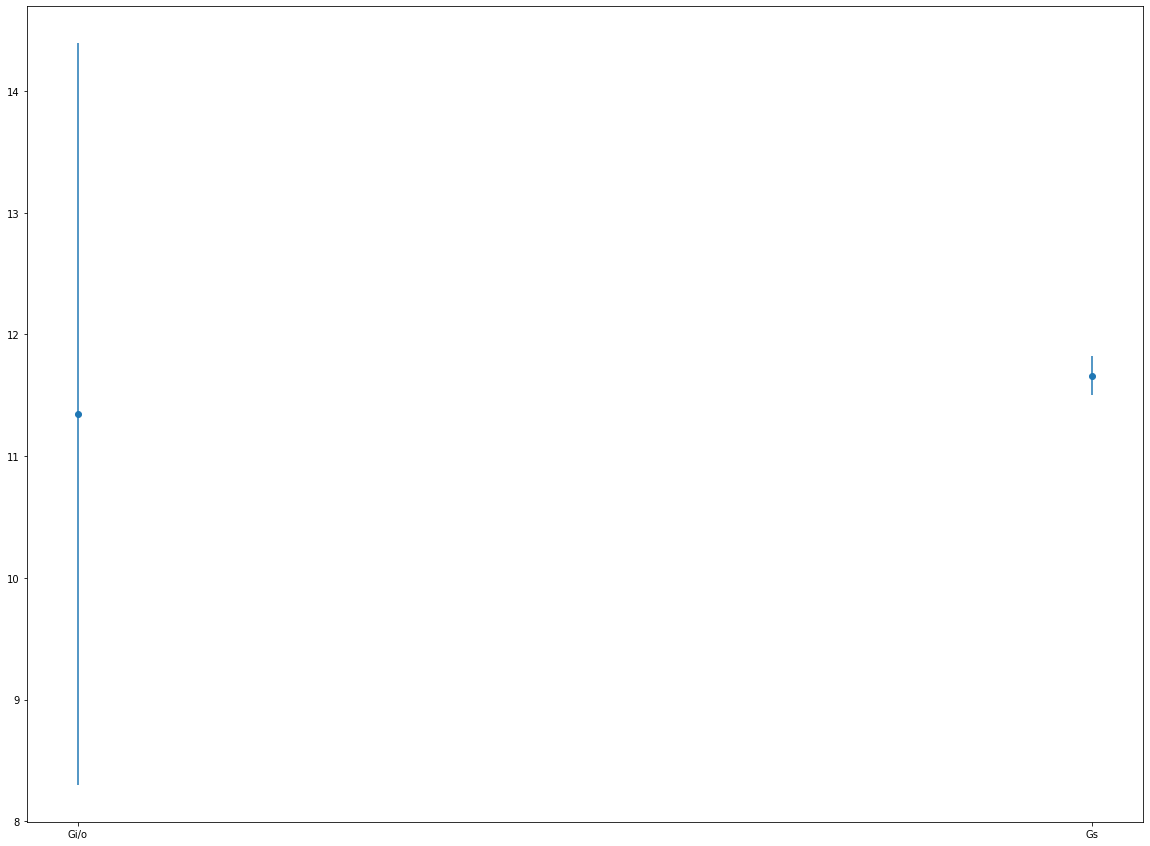

In [84]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array(['Gi/o', 'Gs', 'Gq11'])
y = [np.mean(poi_gio_arr), np.mean(poi_gs_arr), np.mean(poi_q11_arr)]
e = np.array([np.std(poi_gio_arr), np.std(poi_gs_arr), np.std(poi_q11_arr)])
plt.errorbar(x, y, e, linestyle='None', fmt='-o')
plt.show()

In [44]:
def get_cell(dataframe, row_idx, col_idx):
    if (row_idx in dataframe.index.to_list()) & (col_idx in dataframe.columns.to_list()):
        return dataframe.loc[row_idx, col_idx].astype(float)
    else:
        return None

In [246]:
def make_overview_df(dists_df_list):
    cols = []
    rows = []
    for i in range(len(dists_df_list)):
        l = dists_df_list[i]
        df = l[2]
        g_ind = df.index.to_list()
        r_ind = df.columns.to_list()
        cols = list(set(cols + r_ind))
        rows = list(set(rows + g_ind))
    occ_df = pd.DataFrame(index=rows, columns=cols)
    mean_df = pd.DataFrame(index=rows, columns=cols)
    std_df = pd.DataFrame(index=rows, columns=cols)
    for i in range(len(rows)):
        for j in range(len(cols)):
            val_list = []
            row_idx = rows[i]
            col_idx = cols[j]
            for k in range(len(dists_df_list)):
                df = dists_df_list[k][2]
                val = get_cell(df, row_idx, col_idx)
                if type(val) == pd.core.series.Series:
                    val = val.iloc[0]
                if val != None:
                    val_list.append(val)
            occ_df.loc[row_idx, col_idx] = len(val_list)
            mean_df.loc[row_idx, col_idx] = np.mean(val_list)
            std_df.loc[row_idx, col_idx] = np.std(val_list)
    occ_df = occ_df.sort_index().reindex(sorted(occ_df.columns), axis=1).astype(int)
    mean_df = mean_df.sort_index().reindex(sorted(mean_df.columns), axis=1).astype(float)
    std_df = std_df.sort_index().reindex(sorted(std_df.columns), axis=1).astype(float)
    return occ_df, mean_df, std_df

In [247]:
def make_overview_plots(df, title='Occurances', cl='A', gprot='Gs', figsize=(20, 15), path='plots/', show=True, save=False):
    name = title + '_' + cl + '_' + gprot
    rcParams['figure.figsize'] = 20, 15
    ax = sns.heatmap(df, cmap='RdYlGn_r', linewidths=.1, annot=True)
    ax.set_title(title + ' ' + cl + ' ' + gprot)
    if show:
        ax.plot()
    if save:
        ax.figure.savefig(path+name+'.png')

# Gio

In [248]:
occ_df, mean_df, std_df = make_overview_df(list_dists_df_list[0])

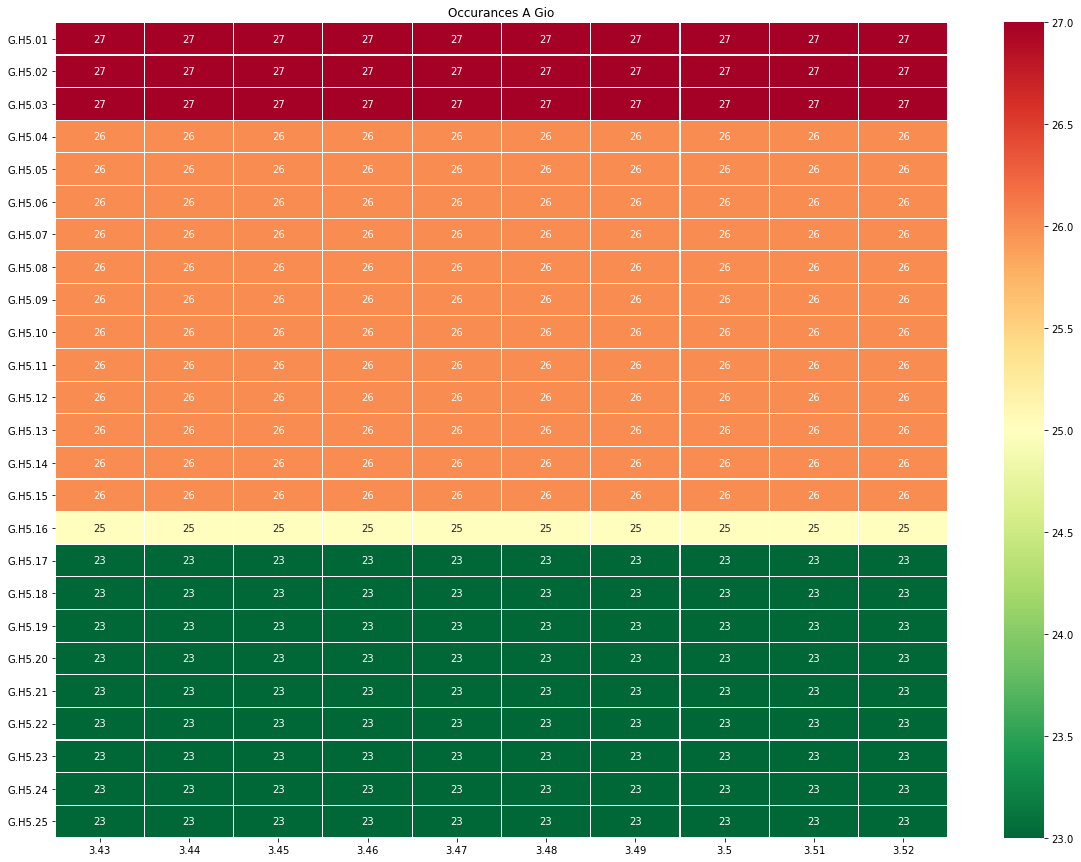

In [249]:
make_overview_plots(occ_df, title='Occurances', cl='A', gprot='Gio', save=True)

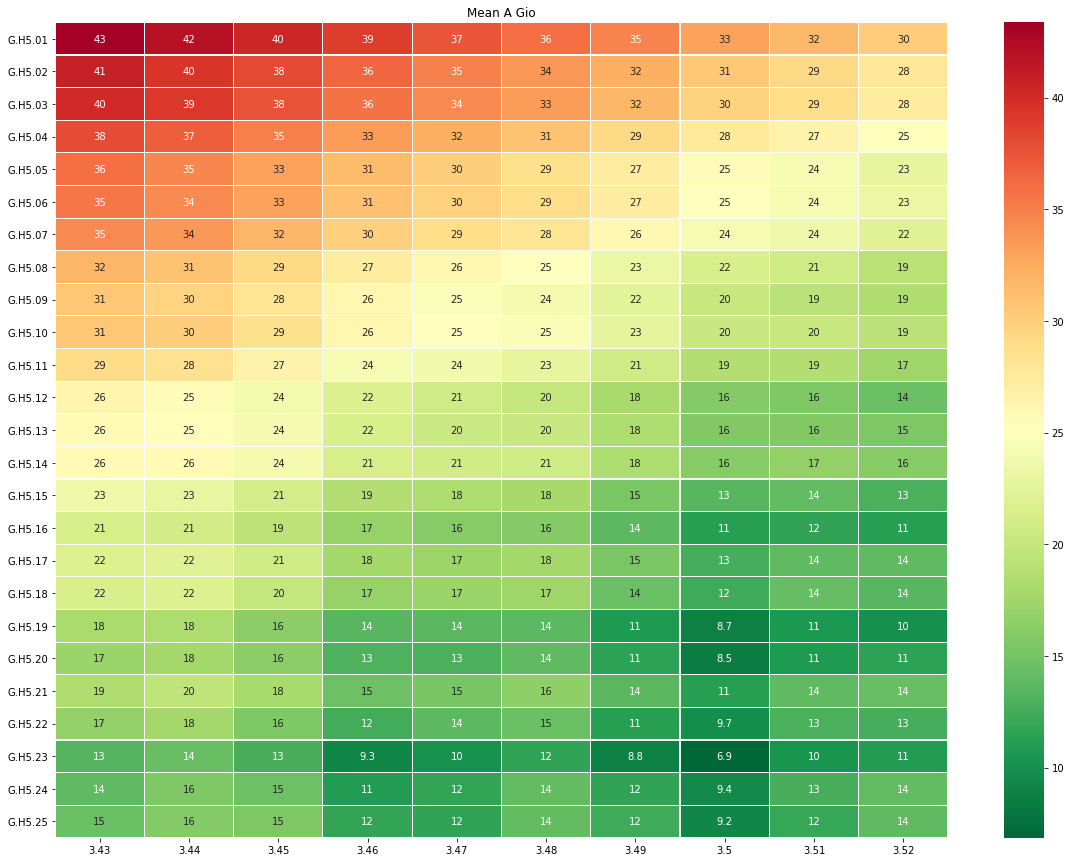

In [250]:
make_overview_plots(mean_df, title='Mean', cl='A', gprot='Gio', save=True)

In [251]:
"""locs = [round(x/100+7.41,2) for x in range(16)]
print(locs)
mean_df.loc[:, locs]"""

'locs = [round(x/100+7.41,2) for x in range(16)]\nprint(locs)\nmean_df.loc[:, locs]'

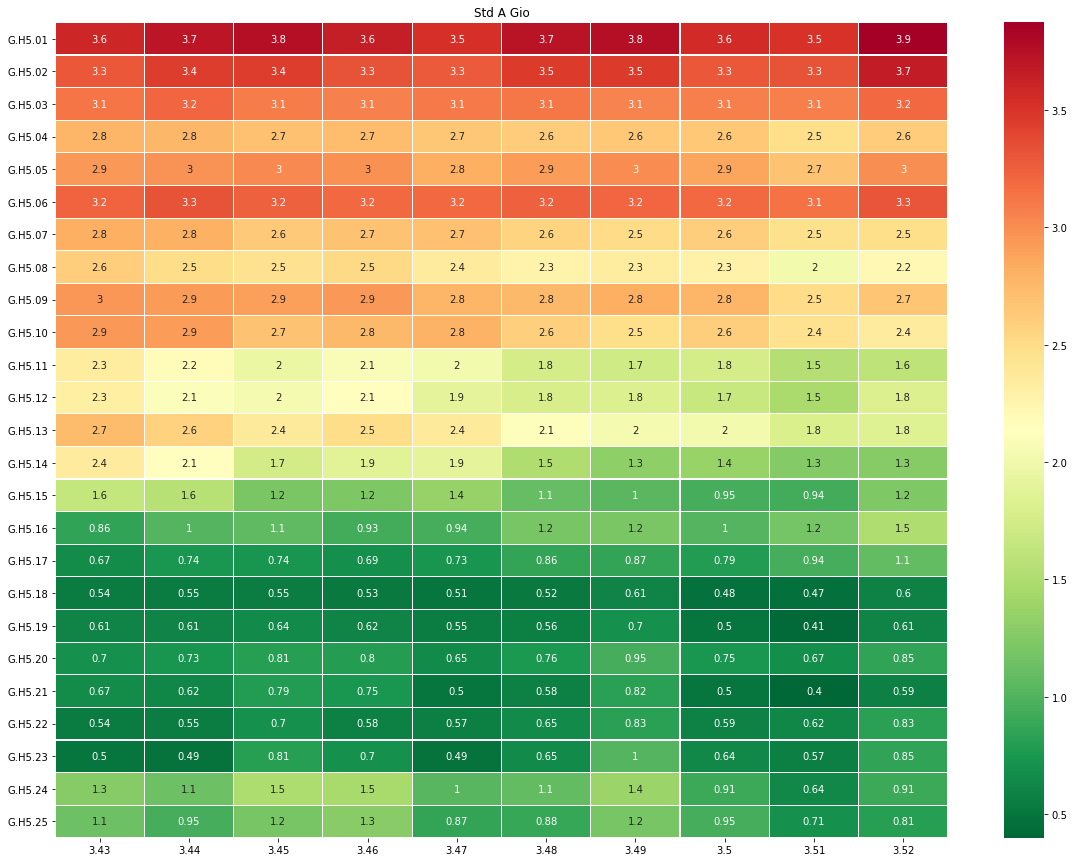

In [252]:
make_overview_plots(std_df, title='Std', cl='A', gprot='Gio', save=True)

# Gs

In [253]:
occ_df, mean_df, std_df = make_overview_df(list_dists_df_list[1])

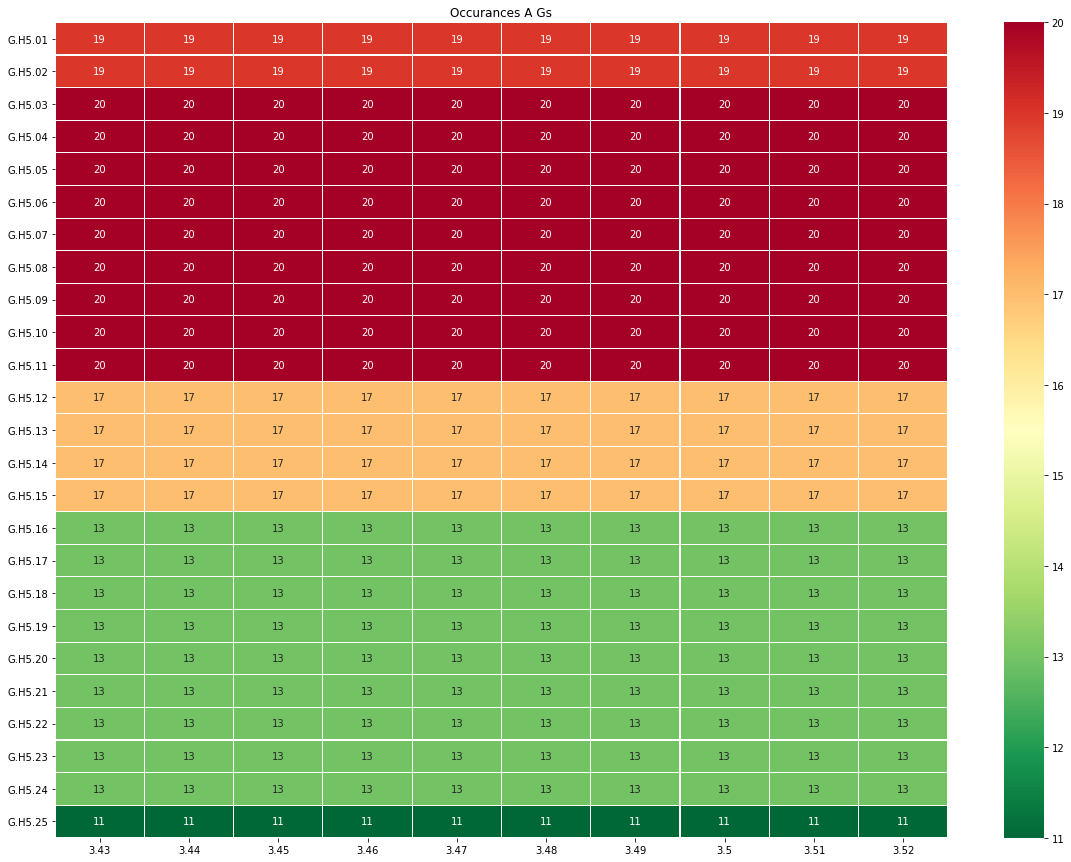

In [254]:
make_overview_plots(occ_df, title='Occurances', cl='A', gprot='Gs', save=True)

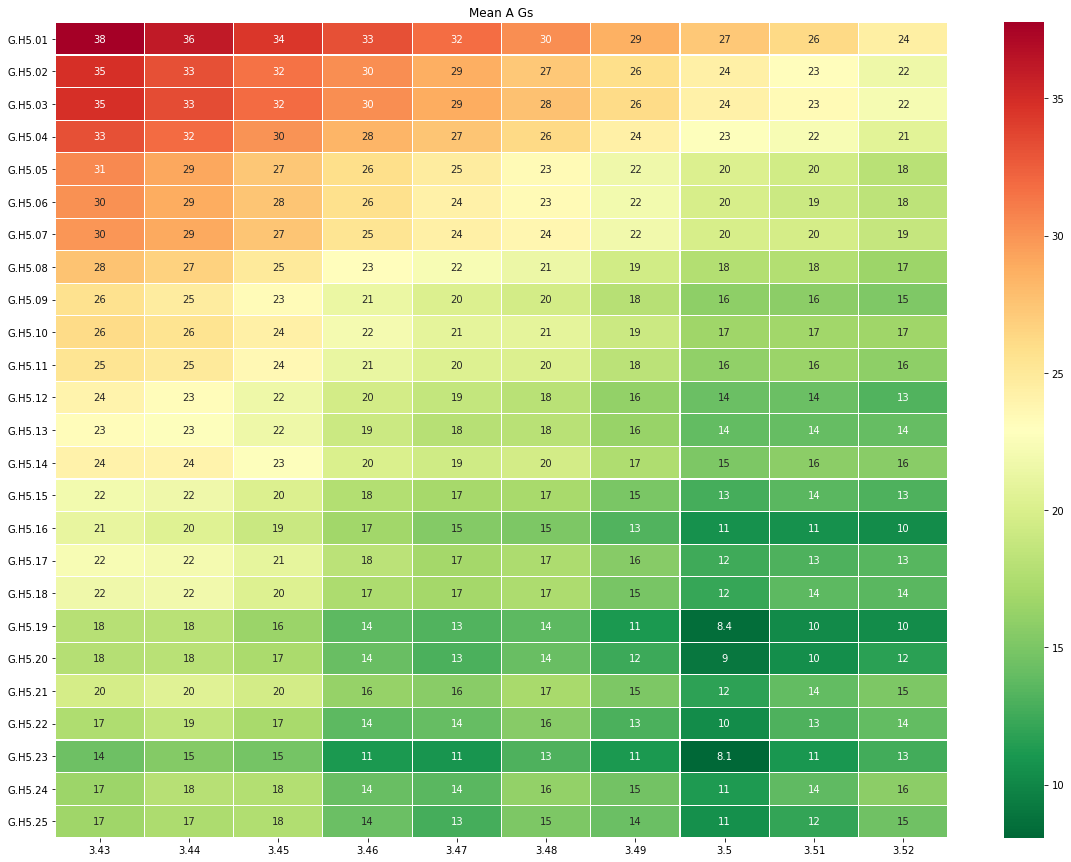

In [255]:
make_overview_plots(mean_df, title='Mean', cl='A', gprot='Gs', save=True)

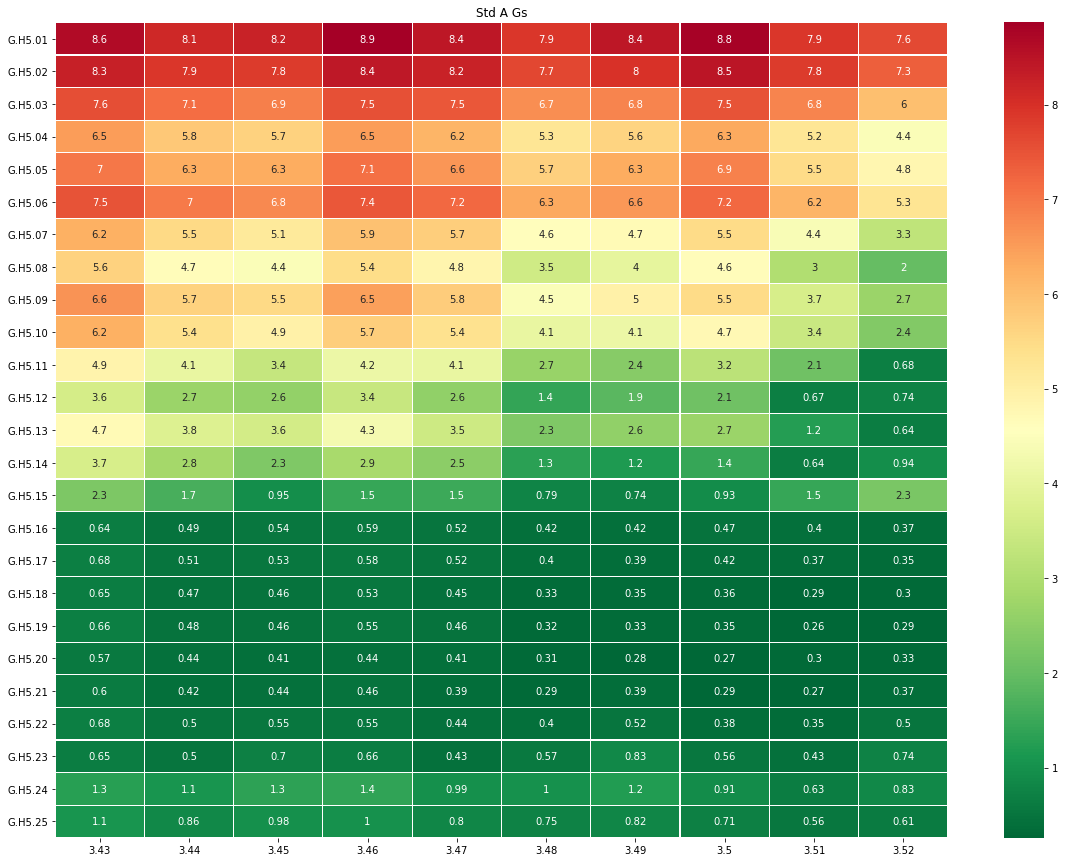

In [256]:
make_overview_plots(std_df, title='Std', cl='A', gprot='Gs', save=True)

# Gq/11

In [257]:
occ_df, mean_df, std_df = make_overview_df(list_dists_df_list[2])

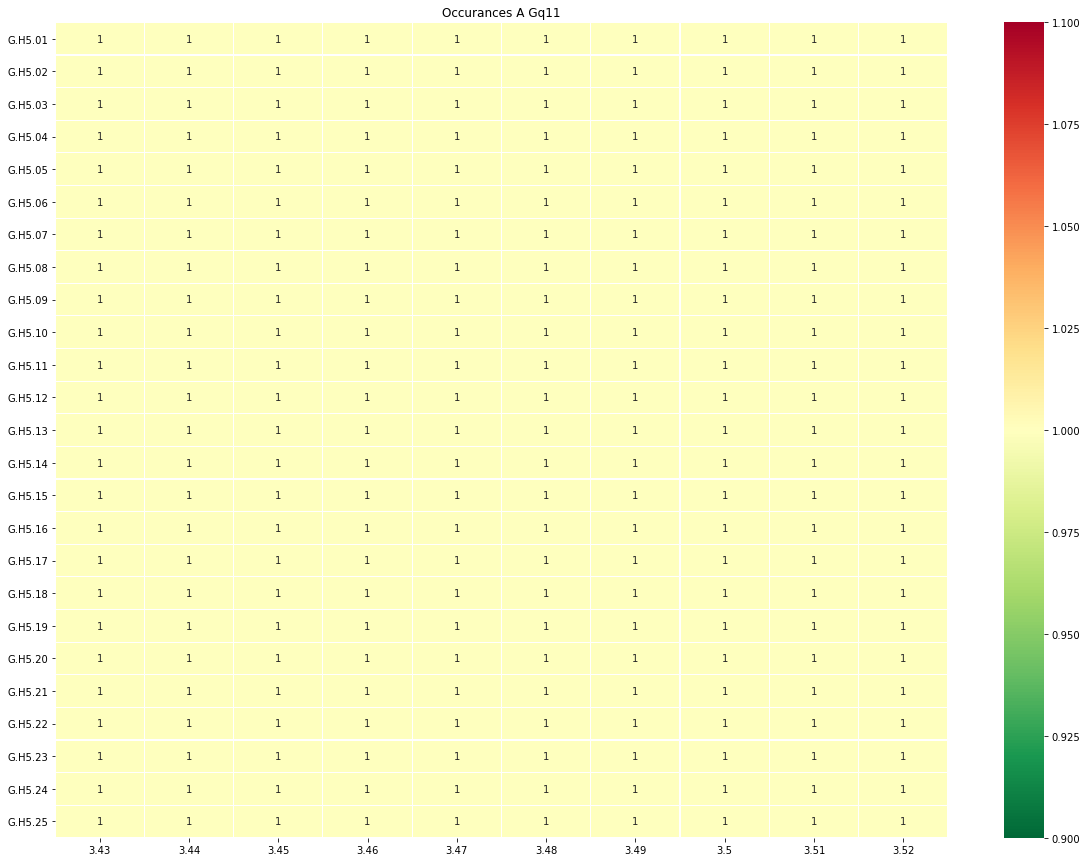

In [258]:
if len(occ_df)>0:
    make_overview_plots(occ_df, title='Occurances', cl='A', gprot='Gq11', save=True)

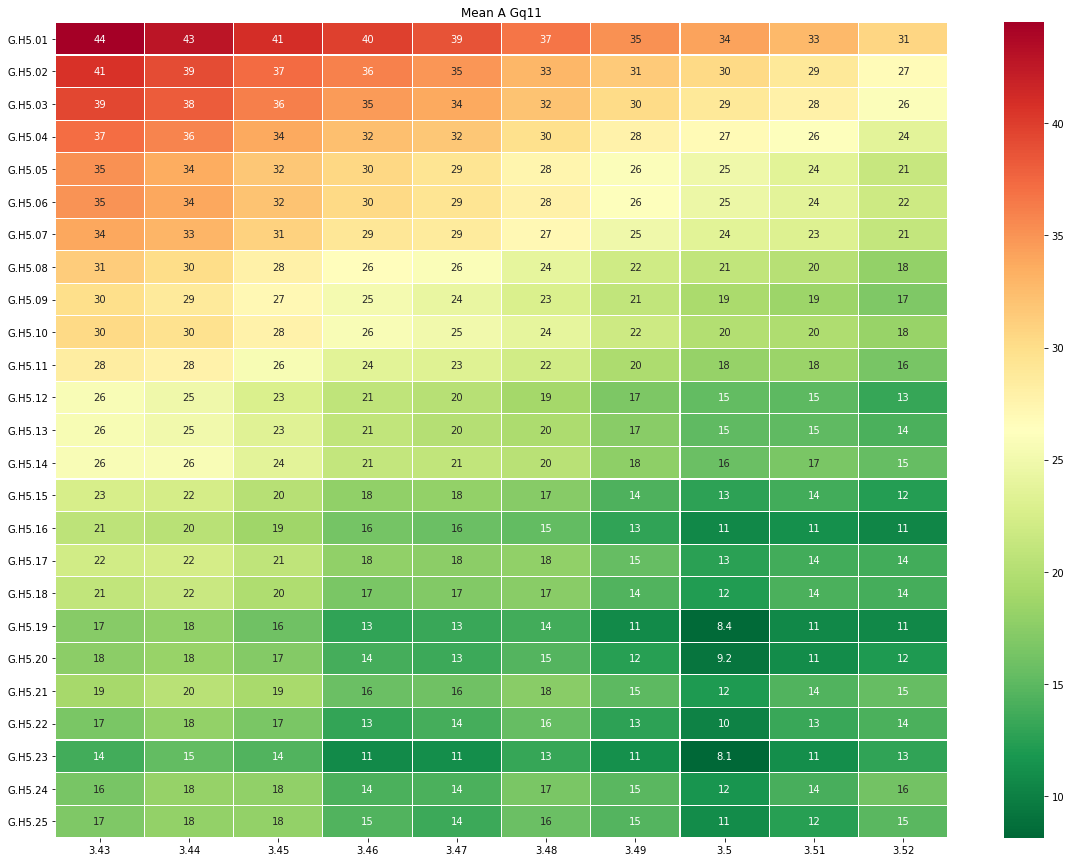

In [259]:
if len(occ_df)>0:
    make_overview_plots(mean_df, title='Mean', cl='A', gprot='Gq11', save=True)

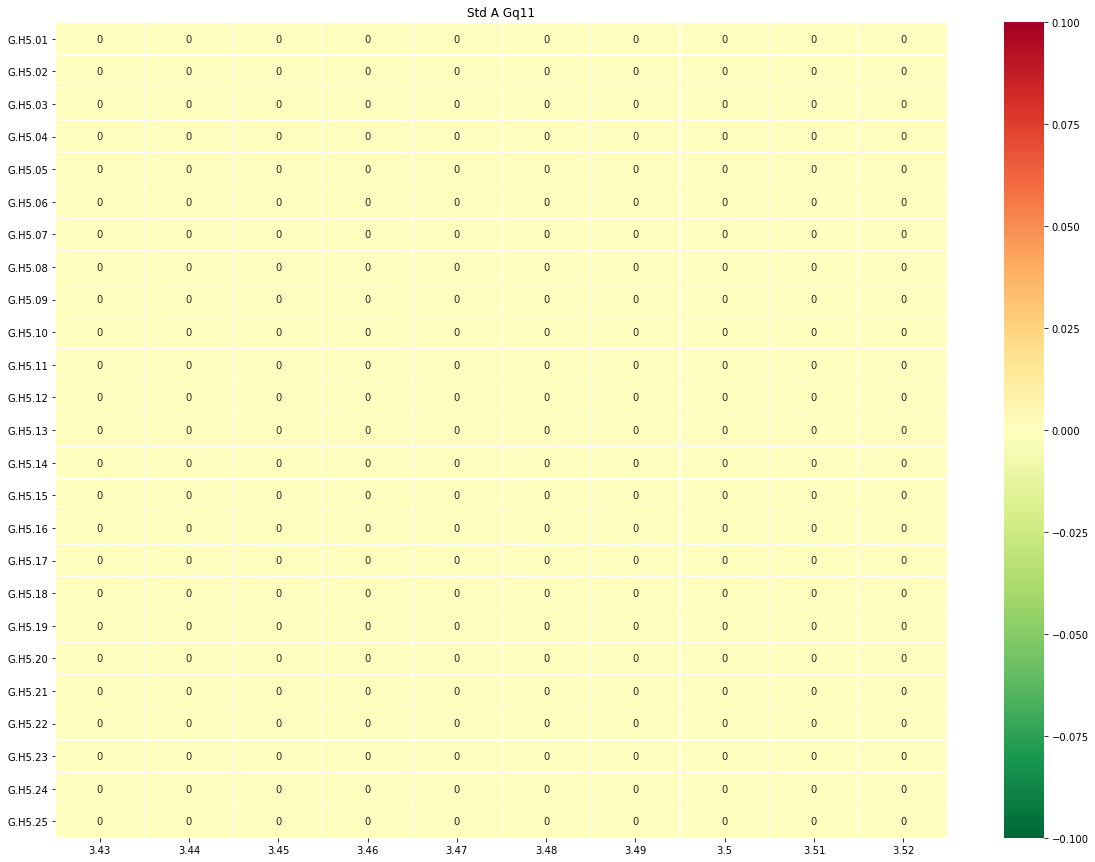

In [260]:
if len(occ_df)>0:
    make_overview_plots(std_df, title='Std', cl='A', gprot='Gq11', save=True)

# Difference

In [263]:
def get_overview_diff(std_df1, std_df2, mean_df1, mean_df2, ab=False, cutoff_mean=10):
    col1 = std_df1.columns.to_list()
    col2 = std_df2.columns.to_list()
    ind1 = std_df1.index.to_list()
    ind2 = std_df2.index.to_list()
    if col1 != col2:
        print("receptor gen numbers do not match")
    if ind1 != ind2:
        print("gprotein gen numbers do not match")
    col = sorted(list(set(col1+col2)))
    ind = sorted(list(set(ind1+ind2)))
    val1 = std_df1.to_numpy().astype(float)
    val2 = std_df2.to_numpy().astype(float)
    mask_m1 = mean_df1.to_numpy().astype(float) > cutoff_mean
    mask_m2 = mean_df2.to_numpy().astype(float) > cutoff_mean
    data = val1-val2
    if ab:
        data = np.abs(data)
    data[mask_m1] = np.nan
    data[mask_m2] = np.nan
    return pd.DataFrame(data=data, index=ind, columns=col)

In [306]:
section = 'H5'
poi =  'G.H5.23', 7.50
start = 7.40
end = 8.53
l = [filtered_indices_gio, filtered_indices_gs, filtered_indices_q11]

In [307]:
len(l[0])+len(l[1])+len(l[2])

53

In [308]:
list_poi_list, list_dists_df_list = get_interaction_tables(l, section=section, poi=poi, 
                                                           start=start, end=end)

In [309]:
occ_df1, mean_df1, std_df1 = make_overview_df(list_dists_df_list[0])
occ_df2, mean_df2, std_df2 = make_overview_df(list_dists_df_list[1])
diff_df = get_overview_diff(std_df1, std_df2, mean_df1, mean_df2, ab=False, cutoff_mean=12)

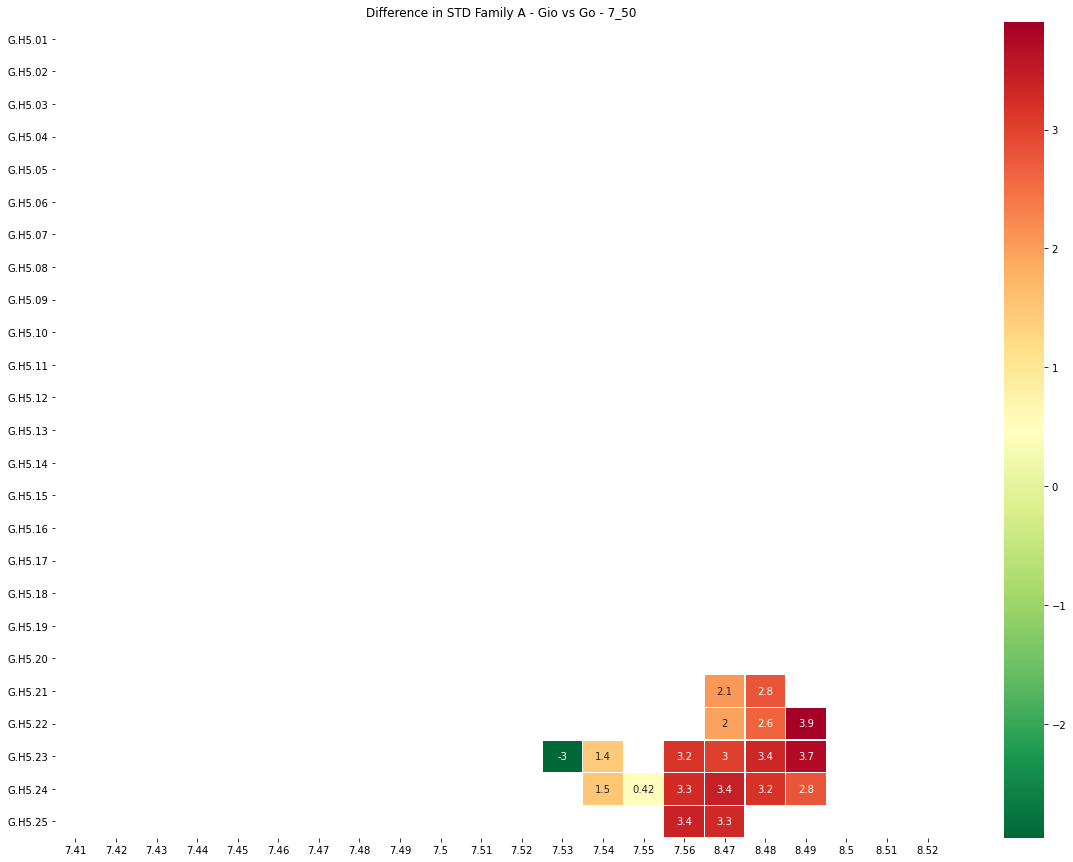

In [310]:
make_overview_plots(diff_df, title='Difference in STD', cl='Family A', gprot='- Gio vs Go - 7_50', save=True)

In red (positive range) we see interactions where the standard-deviation in Gio is greater than in Gs,
In green (negative range) the standard deviation in Gio is smaller than in Gs. Use the Flag "ab" in get_overview_diff to look at absolute differences!

In [311]:
section = 'H5'
poi =  'G.H5.23', 3.50
start = 3.42
end = 3.53
l = [filtered_indices_gio, filtered_indices_gs, filtered_indices_q11]

In [312]:
len(l[0])+len(l[1])+len(l[2])

53

- Gi/o group 1: all the 5h5-smth, ada2b
- Gi/o group 2: the rest

In [313]:
list_poi_list, list_dists_df_list = get_interaction_tables(l, section=section, poi=poi, 
                                                           start=start, end=end)

In [314]:
occ_df1, mean_df1, std_df1 = make_overview_df(list_dists_df_list[0])
occ_df2, mean_df2, std_df2 = make_overview_df(list_dists_df_list[1])
diff_df = get_overview_diff(std_df1, std_df2, mean_df1, mean_df2, ab=False, cutoff_mean=12)

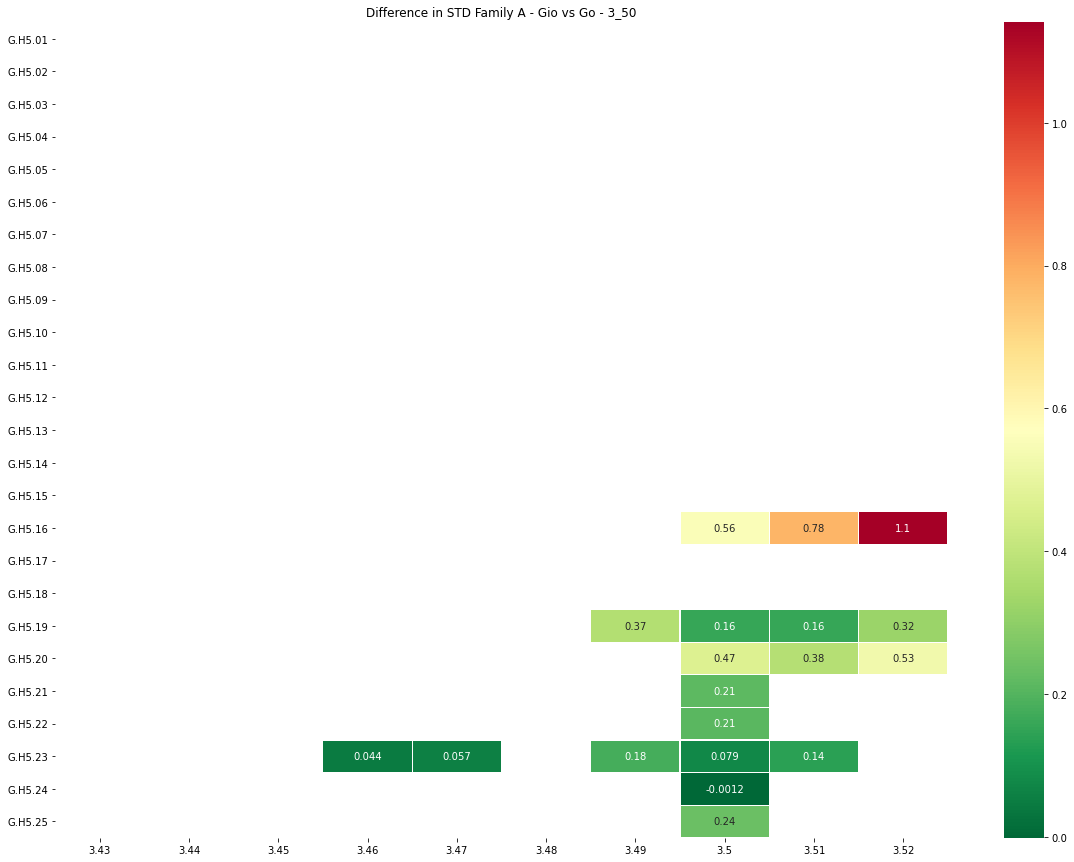

In [315]:
make_overview_plots(diff_df, title='Difference in STD', cl='Family A', gprot='- Gio vs Go - 3_50', save=True)

In [ ]:
#1: update databank, adding h5 gen numbers starting from end
#2: vectors  --> H5: h5.03 - h5.20; R: TM3-> 3.40 - 3.53
#3: classification of groups
#4: affinities --> 
#5: gq annotate